In [1]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Dense,BatchNormalization,Dropout,GlobalAveragePooling2D,Flatten,Input
from tensorflow.keras.activations import relu,softmax,tanh
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np

In [2]:
import os
import pandas as pd
from tqdm import tqdm
from PIL import Image
from glob import glob
import cv2
from sklearn.metrics import classification_report
from keras.utils.vis_utils import plot_model
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [3]:
test=image_dataset_from_directory("Testing",label_mode="categorical",image_size=(300,300),batch_size=100)
train=image_dataset_from_directory("Training",label_mode="categorical",image_size=(300,300),batch_size=100)

Found 393 files belonging to 4 classes.
Found 2870 files belonging to 4 classes.


In [4]:
def convert_image_to_dataset(file_location):
    label=0
    df=pd.DataFrame()
    for category in glob(file_location+'/*'):
        for file in tqdm(glob(category+'/*')):
            img_array=cv2.imread(file)
            img_array=cv2.resize(img_array,(224, 224))
            data=pd.DataFrame({'image':[img_array],'label':[label]})
            df=df.append(data)
        label+=1
    return df.sample(frac=1).reset_index(drop=True)

def inverse_classes(num):
    if num==0:
        return 'Glioma Tumor_0'
    elif num==1:
        return 'Meningioma Tumor_1'
    elif num==2:
        return 'No Tumor_2'
    else:
        return 'Pituitary Tumor_3'

In [5]:
train_data=convert_image_to_dataset('Training')
train_x=np.array(train_data.image.to_list())

100%|██████████| 827/827 [00:37<00:00, 22.25it/s]


In [6]:
test_data=convert_image_to_dataset('Testing')
test_x=np.array(test_data.image.to_list())

100%|██████████| 74/74 [00:04<00:00, 16.59it/s]


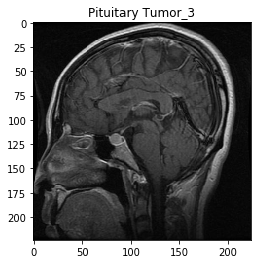

In [7]:
index = 48
plt.imshow(train_x[index])
plt.title(inverse_classes(train_data.label[index]))
plt.show()

In [8]:
model=Sequential()
model.add(Input(shape=(224,224,3)))
model.add(Conv2D(128,(3,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 128)     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 128)     512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        1

In [9]:
history=model.fit(train_x,train_data.label,validation_split=0.1,epochs=15)

Epoch 1/15
81/81 [==============================] - 517s 6s/step - loss: 1.3210 - accuracy: 0.5939 - val_loss: 6.4359 - val_accuracy: 0.4530
Epoch 2/15
81/81 [==============================] - 491s 6s/step - loss: 0.7540 - accuracy: 0.7228 - val_loss: 1.8351 - val_accuracy: 0.4634
Epoch 3/15
81/81 [==============================] - 491s 6s/step - loss: 0.5985 - accuracy: 0.7580 - val_loss: 0.8462 - val_accuracy: 0.6411
Epoch 4/15
81/81 [==============================] - 497s 6s/step - loss: 0.4491 - accuracy: 0.8188 - val_loss: 1.1641 - val_accuracy: 0.7073
Epoch 5/15
81/81 [==============================] - 493s 6s/step - loss: 0.3541 - accuracy: 0.8606 - val_loss: 4.3128 - val_accuracy: 0.3449
Epoch 6/15
81/81 [==============================] - 491s 6s/step - loss: 0.3467 - accuracy: 0.8591 - val_loss: 1.4967 - val_accuracy: 0.5192
Epoch 7/15
81/81 [==============================] - 493s 6s/step - loss: 0.3162 - accuracy: 0.8842 - val_loss: 1.3929 - val_accuracy: 0.7387
Epoch 8/15
81

In [63]:
#model.compile(loss=categorical_crossentropy,optimizer=Adam(ExponentialDecay(1e-3,50000,.9)),metrics=("accuracy"))

In [18]:
#hist=model.fit(train,epochs=3,validation_data=test)#56#125

ValueError: `validation_split` is only supported for Tensors or NumPy arrays, found following types in the input: [<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>]

In [10]:
history.history

{'loss': [1.6031770706176758,
  0.7271976470947266,
  0.5650194883346558,
  0.44693925976753235,
  0.34034040570259094,
  0.3381096422672272,
  0.24676528573036194,
  0.22697845101356506,
  0.22961856424808502,
  0.2005494087934494],
 'accuracy': [0.5725899934768677,
  0.714672863483429,
  0.7684862613677979,
  0.8300426006317139,
  0.8656600713729858,
  0.8776616454124451,
  0.9036004543304443,
  0.9128919839859009,
  0.9190863370895386,
  0.931475043296814],
 'val_loss': [1.8059537410736084,
  0.920886754989624,
  1.0633379220962524,
  1.4745714664459229,
  0.6747310757637024,
  0.6332968473434448,
  0.7240676879882812,
  5.692911624908447,
  0.6665717363357544,
  0.5704548954963684],
 'val_accuracy': [0.3728223145008087,
  0.7142857313156128,
  0.6620209217071533,
  0.6794425249099731,
  0.8118466734886169,
  0.8675957918167114,
  0.8397212624549866,
  0.5783972144126892,
  0.8362369537353516,
  0.888501763343811]}

In [11]:
model.evaluate(test_x, test_data.label)

13/13 [==============================] - 22s 2s/step - loss: 3.1424 - accuracy: 0.7481


[3.142446756362915, 0.7480915784835815]

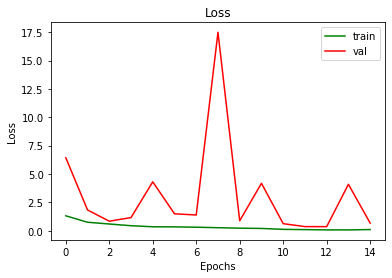

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],c = "green")
plt.plot(history.history["val_loss"],c = "red")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "val"])
plt.show()

In [14]:
type(test_x)

numpy.ndarray

In [13]:
model.predict(test_x)

array([[5.17601101e-03, 2.91236341e-01, 6.89280033e-01, 1.43076042e-02],
       [5.66998422e-01, 1.09950334e-01, 2.97317486e-02, 2.93319583e-01],
       [1.64065113e-05, 7.73687934e-05, 7.06762597e-02, 9.29229975e-01],
       ...,
       [2.67545460e-04, 6.72980487e-01, 2.25243688e-01, 1.01508334e-01],
       [2.67849505e-01, 1.34439557e-03, 7.24777160e-03, 7.23558307e-01],
       [3.95682231e-02, 1.51294157e-01, 7.65556097e-01, 4.35815342e-02]],
      dtype=float32)

In [31]:
(train_x[59].shape)

(224, 224, 3)

In [35]:
(train_x[np.newaxis, 78]).shape

(1, 224, 224, 3)

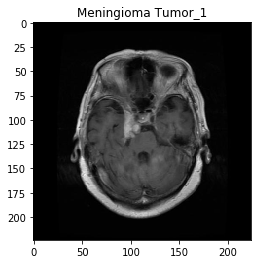

1


In [16]:
index = 59
plt.imshow(train_x[index])
plt.title(inverse_classes(test_data.label[index]))
plt.show()
y_predict = model.predict(test_x[np.newaxis, index])
print(np.argmax(y_predict))

In [15]:
model.save("models/models1.h5")

In [16]:
load_model = load_model("models/models1.h5")

In [17]:
load_model.evaluate(test_x, test_data.label)

13/13 [==============================] - 22s 2s/step - loss: 3.1424 - accuracy: 0.7481


[3.142446756362915, 0.7480915784835815]

In [42]:
img_arr = cv2.imread('det.jpg')
img_arr=cv2.resize(img_arr,(224, 224))

In [3]:
from tensorflow.keras.models import load_model
import tensorflow as tf

In [43]:
img_arr.shape

(224, 224, 3)

In [44]:
img_array = tf.expand_dims(img_arr, axis=0)
img_array.shape

TensorShape([1, 224, 224, 3])

In [45]:
model_path = 'models/models1.h5'
model_sv = load_model(model_path)

y_predict = model_sv.predict(img_array)

In [ ]:
print(np.argmax(y_predict))